# PHP - Pulsating Heat Pipe [AL2O3, 40FR]

In [9]:
from analysis import PulseHeatPipe
from analysis import DataVisualisation

In [12]:
analysis = PulseHeatPipe("data/al2o3_diwater_exp/40_FR/")

Data loaded from directory: data/al2o3_diwater_exp/40_FR/


In [13]:
df, df_conv = analysis.data_etl()

Compiled and converted data is saved at: data/al2o3_diwater_exp/40_FR/'combined_converted_data.csv'


In [15]:
df_gfe = analysis.gibbs_fe(df_conv)

Gibbs Free Energy calculated data saved at: data/al2o3_diwater_exp/40_FR/'gfe_combined.csv


In [16]:
df_gfe

,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W],GFE[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]
0,0.0,296.816667,296.40,0.416667,0.313307,0.005208,-2863.978655,-2859.958246,-4.020409
1,0.5,297.816667,296.40,1.416667,0.313307,0.017708,-2873.627637,-2859.958246,-13.669391
2,1.0,297.816667,296.40,1.416667,0.313307,0.017708,-2873.627637,-2859.958246,-13.669391
3,1.5,298.150000,296.15,2.000000,0.313307,0.025000,-2876.843964,-2857.546001,-19.297964
4,2.0,299.150000,296.40,2.750000,0.313307,0.034375,-2886.492946,-2859.958246,-26.534700
...,...,...,...,...,...,...,...,...,...
422,58.0,366.150000,332.90,33.250000,0.613283,0.415625,-1488.384689,-1353.224807,-135.159882
423,58.5,366.150000,332.40,33.750000,0.613283,0.421875,-1488.384689,-1351.192328,-137.192362
424,59.0,366.150000,332.40,33.750000,0.613283,0.421875,-1488.384689,-1351.192328,-137.192362
425,59.5,366.350000,332.15,34.200000,0.613283,0.427500,-1489.197681,-1350.176088,-139.021593


In [17]:
visual = DataVisualisation('AL2O3_DI_40FR')

Data loaded from directory: AL2O3_DI_40FR


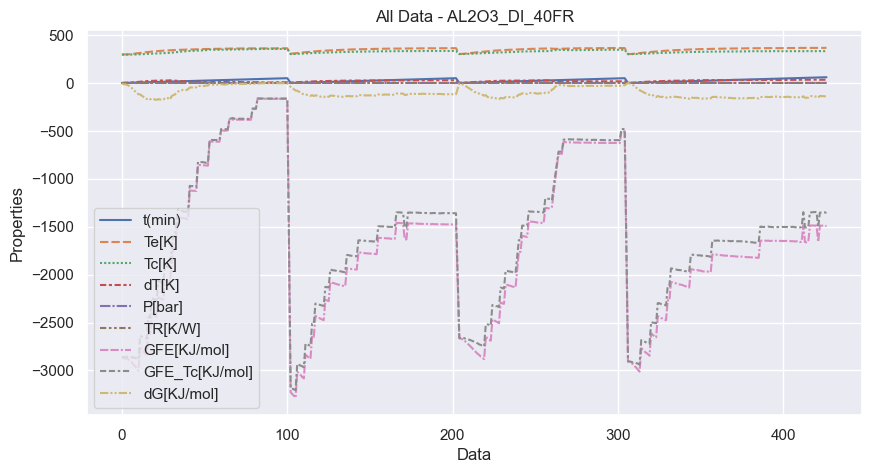

In [18]:
visual.plot_all_data(df_gfe)

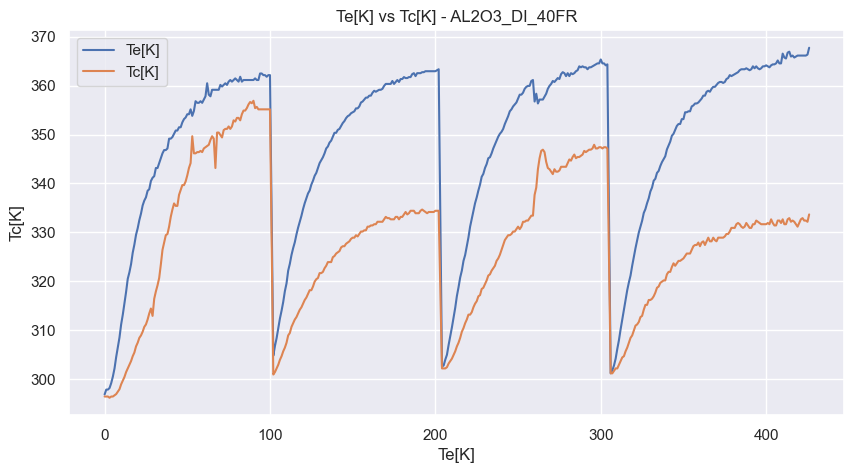

In [19]:
visual.plot_Te_Tc(df_gfe)

In [20]:
df_selected = analysis.data_chop(df_gfe)

Optimal range of temperature(Te) for data selection: [Tmin:296.8167, Tmax:368]


In [21]:
df_mean, df_std = analysis.data_stat(df_selected)

Calculated mean and standard deviation values saved at data/al2o3_diwater_exp/40_FR/'combined_mean.csv' and 'combined_std.csv'


In [22]:
df_mean

,Te[K],t(min),Tc[K],dT[K],P[bar],TR[K/W],GFE[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]
0,300.483333,2.5,296.40,4.083333,0.313307,0.051042,-2899.358256,-2859.958246,-39.400010
1,301.150000,0.0,301.15,0.000000,0.313307,0.000000,-2905.790910,-2905.790910,0.000000
2,301.750000,0.5,301.15,0.600000,0.313307,0.007500,-2911.580299,-2905.790910,-5.789389
3,302.150000,3.0,296.65,5.500000,0.313307,0.068750,-2915.439892,-2862.370492,-53.069401
4,302.550000,0.0,302.15,0.400000,0.346638,0.005000,-2665.002242,-2661.478854,-3.523388
...,...,...,...,...,...,...,...,...,...
204,366.350000,59.5,332.15,34.200000,0.613283,0.427500,-1489.197681,-1350.176088,-139.021593
205,366.550000,52.0,332.65,33.900000,0.579952,0.423750,-1660.306186,-1506.754474,-153.551711
206,366.750000,53.5,332.65,34.100000,0.579952,0.426250,-1661.212095,-1506.754474,-154.457621
207,366.950000,54.0,332.90,34.050000,0.579952,0.425625,-1662.118005,-1507.886862,-154.231143


In [23]:
analysis.data_property_avg(df_mean, df_std)

Tc  average:     321.8592 +- 3.1745 [K]
P   average:     0.5127 +- 0.053 [bar]
dT  average:     19.3065 +- 3.1745 [K]
TR  average:     0.2413 +- 0.0397 [K/W]
GFE average:     -1988.4448 +- 243.1683 [KJ/mol]



In [24]:
analysis.best_TP(df_mean)

Optimal G(T,P) condition at lowest (optimal) dG[-176.9189]
Te optimal:        332.4833[K] 
P  optimal:        0.4133[bar] 
dT optimal:        24.0833[K] 
TR optimal:        0.301[K/W] 
GFE optimal:       dG(332.4833, 0.4133) = -2442.4604 [KJ/mol]



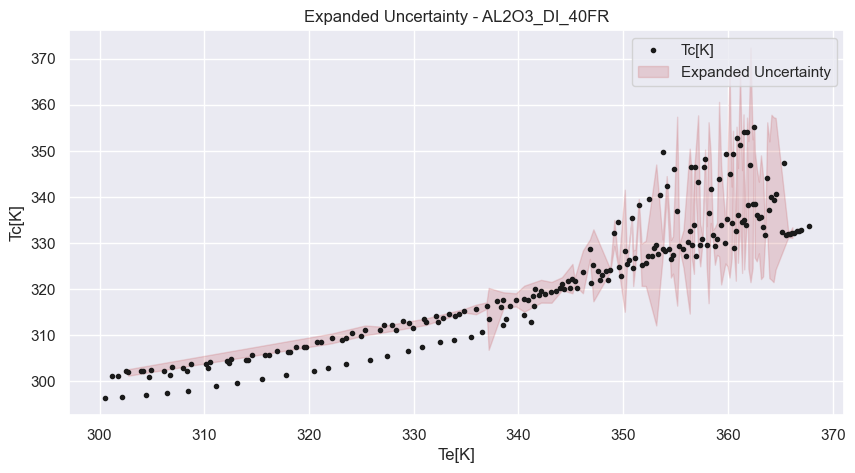

In [25]:
visual.plot_eu(df_mean, df_std, 'Tc[K]')

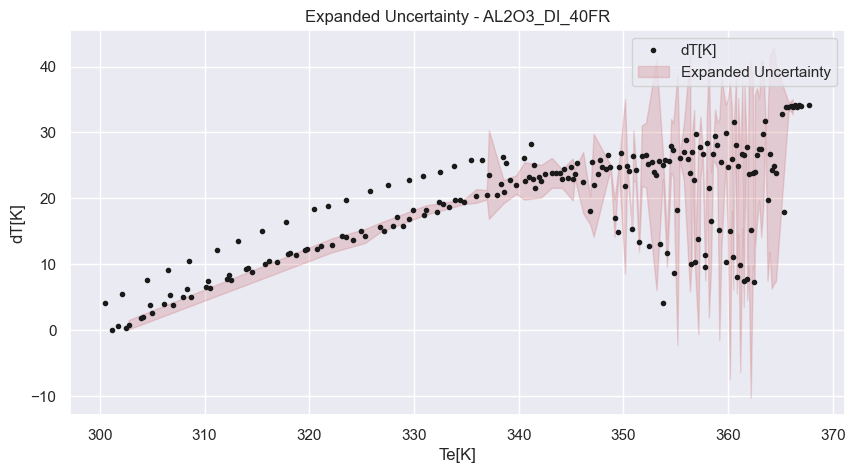

In [26]:
visual.plot_eu(df_mean, df_std, 'dT[K]')

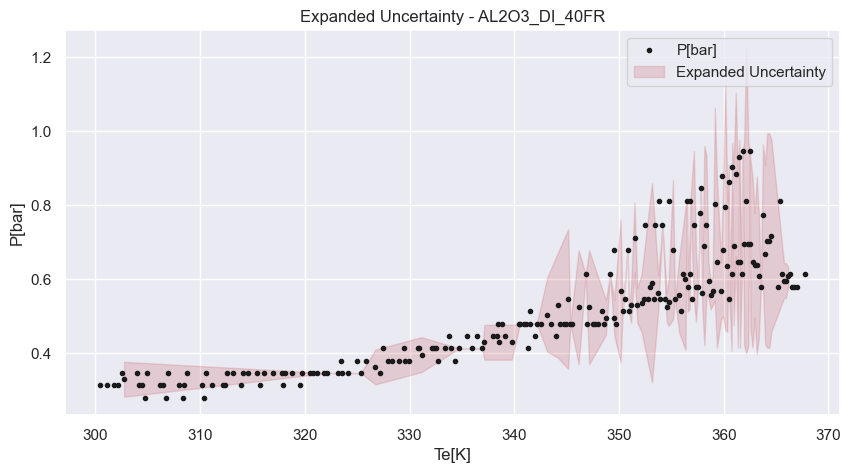

In [27]:
visual.plot_eu(df_mean, df_std, 'P[bar]')

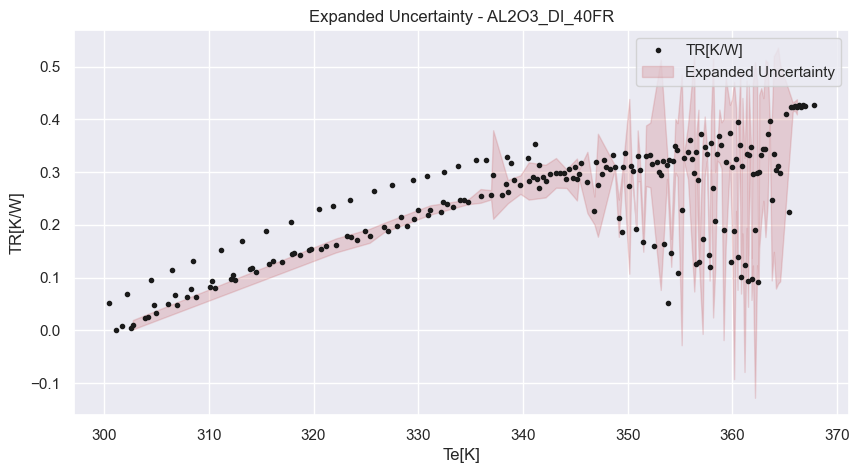

In [31]:
visual.plot_eu(df_mean, df_std, 'TR[K/W]')

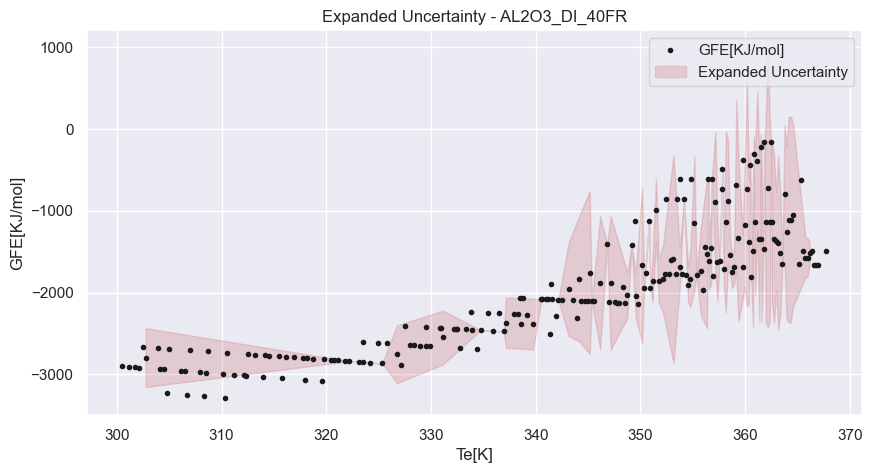

In [29]:
visual.plot_eu(df_mean, df_std, 'GFE[KJ/mol]')

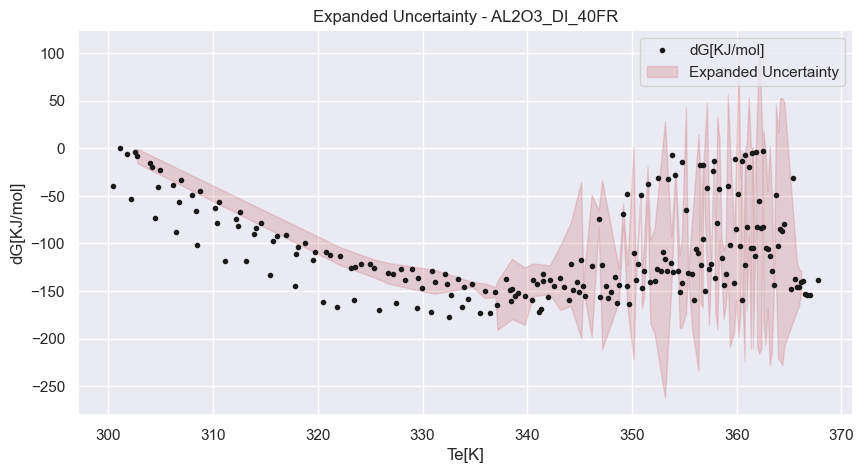

In [30]:
visual.plot_eu(df_mean, df_std, 'dG[KJ/mol]')